In [1]:
# unsupervised machine learning
# lenear regresiion and classification is supervised machine learning
# the most common unsuperviesd machine learning is clustering
# unsupervised is not to predict but to group out the similarity point in a data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Gender
Female    112
Male       88
Name: count, dtype: int64

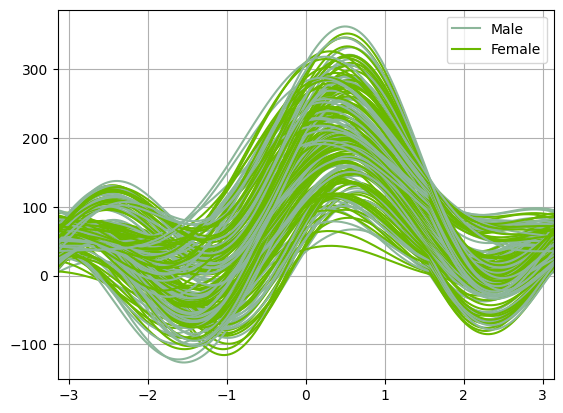

In [3]:
pd.plotting.andrews_curves(df, 'Gender')
df['Gender'].value_counts()

In [4]:
# we need only 2 column 
# select column 3 and 4 only with all its rows
x = df.iloc[:, [3,4]].values

In [5]:
# to chose the suitable number of cluster to use 
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(x)
    wcss.append(km.inertia_)
wcss



[269981.28,
 183653.3289473684,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 37239.835542456036,
 30273.394312070042,
 26676.780769600773,
 21881.878507060967,
 19742.080965794252]

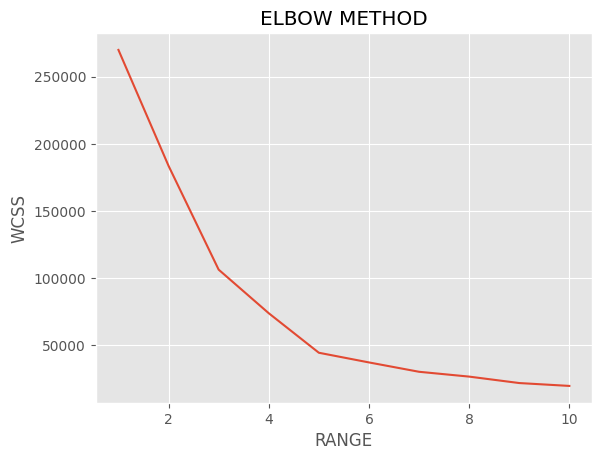

In [6]:
# you need to plot it to decide the suitable cluster to use
plt.style.use('ggplot')
plt.plot(range(1,11),wcss)
plt.xlabel('RANGE')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD')
plt.show()
# note if you have more clustter point, you must plot all before you chose the best


In [7]:
# using cluster 5 
km =KMeans(n_clusters= 5)
ymeans = km.fit_predict(x)
ymeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

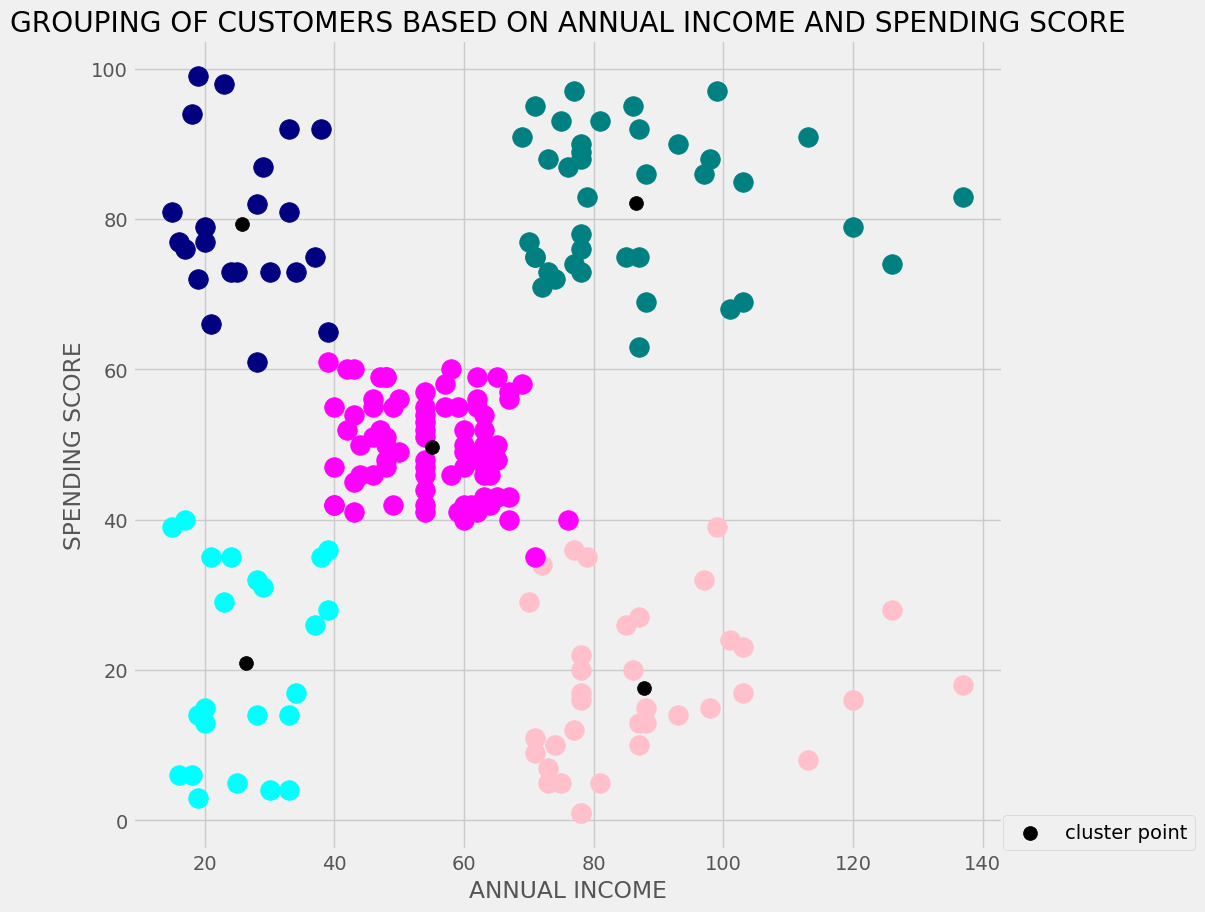

In [8]:
# it good to plot it so you can explain
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,10))
plt.scatter(x[ymeans == 0,0], x[ymeans == 0,1], c='pink', s = 200)
plt.scatter(x[ymeans == 1,0], x[ymeans == 1,1], c='magenta', s = 200)
plt.scatter(x[ymeans == 2,0], x[ymeans == 2,1], c='teal', s = 200)
plt.scatter(x[ymeans == 3,0], x[ymeans == 3,1], c='navy', s = 200)
plt.scatter(x[ymeans == 4,0], x[ymeans == 4,1], c='cyan', s = 200)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s=100, c='black', label = 'cluster point')
plt.xlabel('ANNUAL INCOME')
plt.ylabel('SPENDING SCORE')
plt.title('GROUPING OF CUSTOMERS BASED ON ANNUAL INCOME AND SPENDING SCORE')
plt.legend(loc=[1,0])
plt.show()

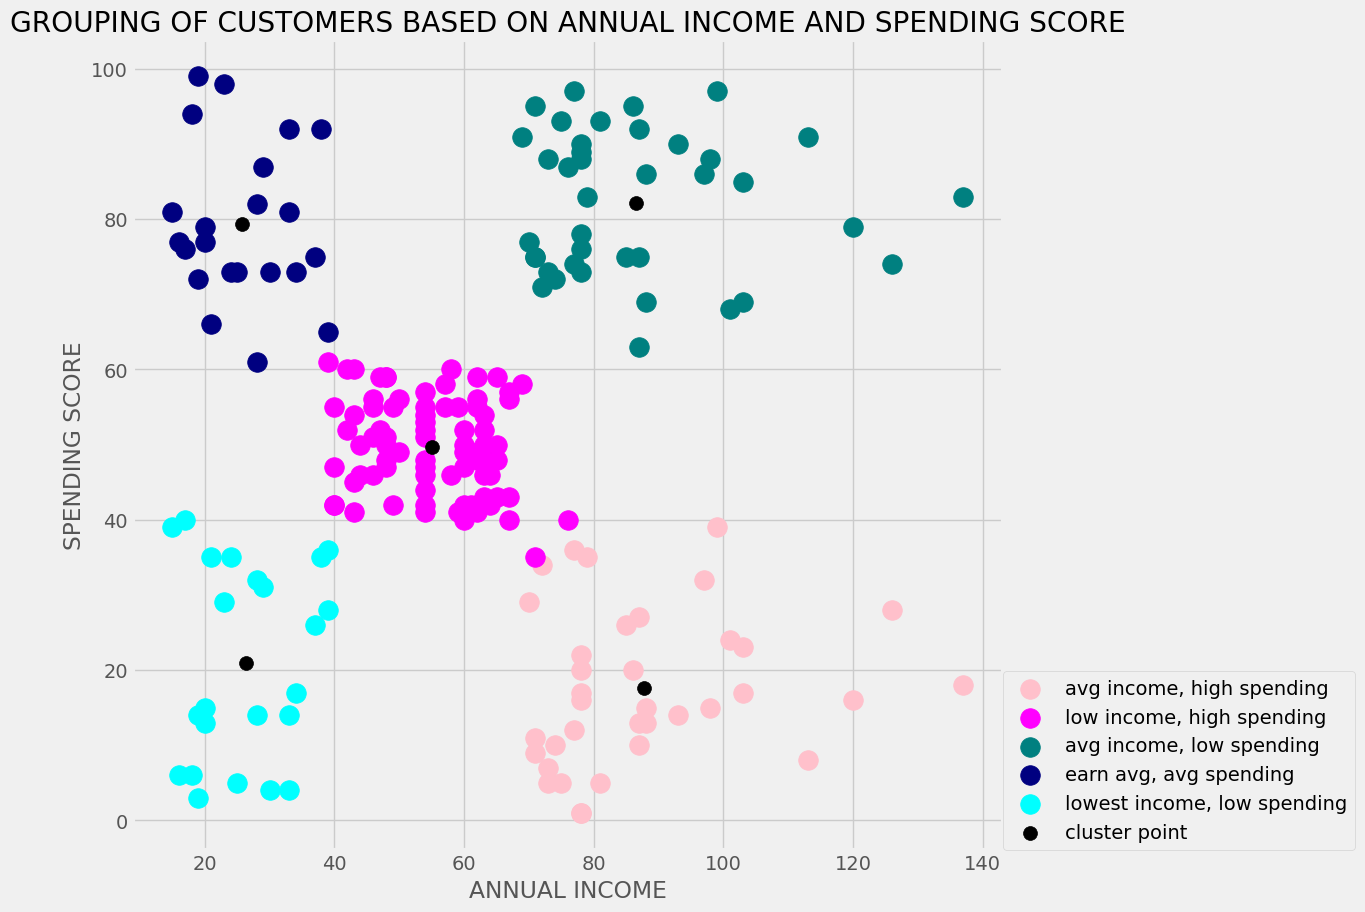

In [ ]:
# to label the groups 
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,10))
plt.scatter(x[ymeans == 0,0], x[ymeans == 0,1], c='pink', s = 200, label ='avg income, high spending')
plt.scatter(x[ymeans == 1,0], x[ymeans == 1,1], c='magenta', s = 200, label = 'low income, high spending' )
plt.scatter(x[ymeans == 2,0], x[ymeans == 2,1], c='teal', s = 200, label = 'avg income, low spending')
plt.scatter(x[ymeans == 3,0], x[ymeans == 3,1], c='navy', s = 200, label = 'earn avg, avg spending')
plt.scatter(x[ymeans == 4,0], x[ymeans == 4,1], c='cyan', s = 200, label = 'lowest income, low spending')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s=100, c='black', label = 'cluster point')
plt.xlabel('ANNUAL INCOME')
plt.ylabel('SPENDING SCORE')
plt.title('GROUPING OF CUSTOMERS BASED ON ANNUAL INCOME AND SPENDING SCORE')
plt.legend(loc=[1,0])
plt.show()